In [50]:
#packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings("ignore")

In [130]:
df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\Insurance\\Sample Insurance Claim Prediction Dataset\\insurance3r2.csv')

# About Data

Age: age of policyholder

Sex: gender of policy holder (female=0, male=1)

BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25

Steps: average walking steps per day of policyholder

Children: number of children / dependents of policyholder

Smoker: smoking state of policyholder (non-smoke=0;smoker=1)

Region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)

Charges: individual medical costs billed by health insurance

InsuranceClaim: yes=1, no=0

In [4]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
steps,1338.0,5328.623318,2453.643236,3000.0000,3008.00000,4007.000,8004.000000,10010.00000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
insuranceclaim,1338.0,0.585202,0.492871,0.0000,0.00000,1.000,1.000000,1.00000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


# Data clean

### Missing value?

Out of 1338 entries, no Missing value detected

### Duplicates?

In [45]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [age, sex, bmi, steps, children, smoker, region, charges, insuranceclaim]
Index: []


No Duplicates as well

### Outliers?

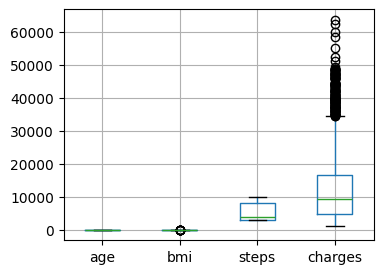

In [147]:
outlier_df_test = df[['age','bmi','steps','charges']].copy()
outlier_df_test.boxplot(figsize=(4, 3))
plt.show()

There are outliers, but lets seperate the viz

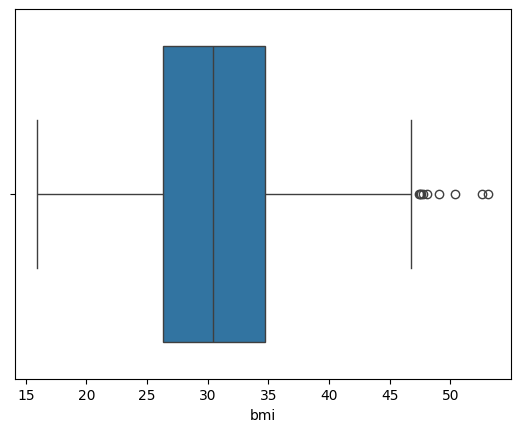

In [146]:
sns.boxplot(data=df,x='bmi')
plt.show()

In [ ]:
#examine number of outliers
var = df['bmi']
Q1 = var.quantile(0.25)
Q3 = var.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(var < lower_bound) | (var > upper_bound)]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 0


In [ ]:
#remove outliers
df = df[(var >= lower_bound) & (var <= upper_bound)]

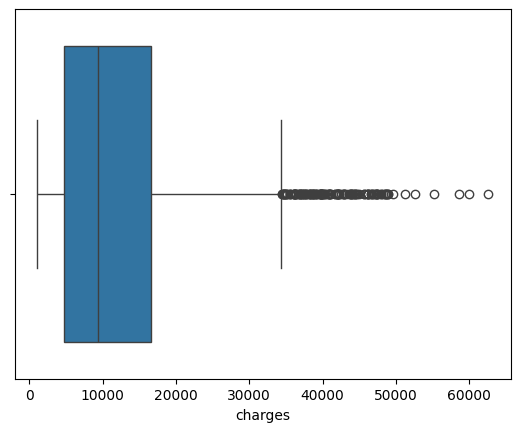

In [150]:
sns.boxplot(data=df,x='charges')
plt.show()

In [152]:
#examine number of outliers
var = df['charges']
Q1 = var.quantile(0.25)
Q3 = var.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(var < lower_bound) | (var > upper_bound)]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 138


138 is roughly 10% of data, the number is too significant to label it as just an outliers

# EDA

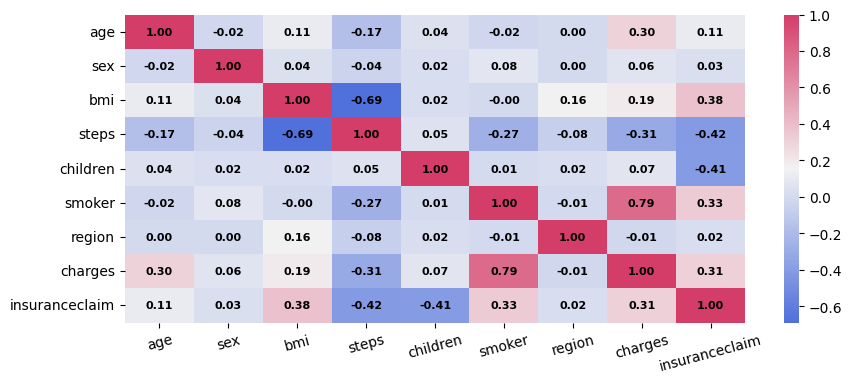

In [154]:
#Correlation Table
label_encode = LabelEncoder()

df2 = df.copy()

for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

plt.figure(figsize=(10,4), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(260, 0, as_cmap=True),
    annot=True,
    annot_kws={'size': 8, 'weight': 'bold', 'color': 'black'},
    fmt='.2f'
)

plt.xticks(rotation=15)
plt.show()

A few points of interest in the correlation table
1. Smokers have correlate with higher premium (0.79)
2. The likelihood of claim increases as their BMI increases (0.38)
3. The likelihood of claim increases if the person is a smoker (0.33)
4. Having less chidren correlate with higher chance of claim (-0.41)

## Visualizations

1. Smokers have correlate with higher premium (0.79)

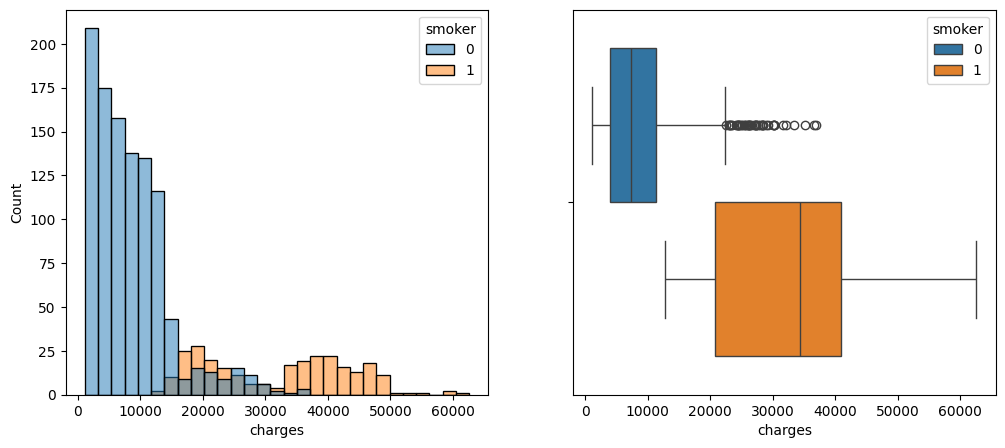

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data =df, x='charges',hue='smoker',ax=axes[0])
sns.boxplot(data =df, x='charges',hue='smoker',ax=axes[1])
plt.show()

Smokers have significantly higher charges than non smoker
1. Non smokers have a median around 8k
2. Smokers have a median around 35k

2. The likelihood of claim increases as their BMI increases (0.38)


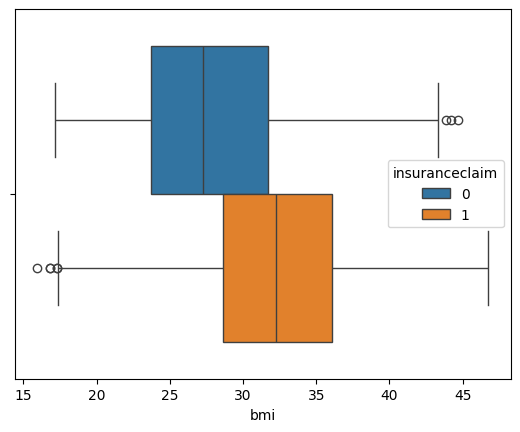

In [178]:
sns.boxplot(data =df, x='bmi',hue='insuranceclaim')
plt.show()

Higher BMI have a higher chances of the person in question making a claim

3. The likelihood of claim increases if the person is a smoker (0.33)

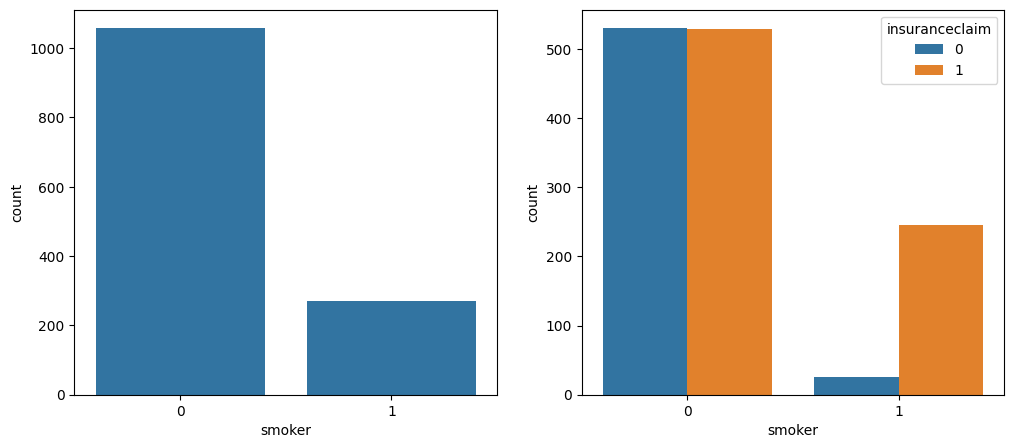

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data = df, x='smoker',ax=axes[0])
sns.countplot(data = df, x='smoker',hue='insuranceclaim',ax=axes[1])

plt.show()

As a a smoker, chances of someone claiming increases significantly

4. Having less chidren correlate with higher chance of claim (-0.41)

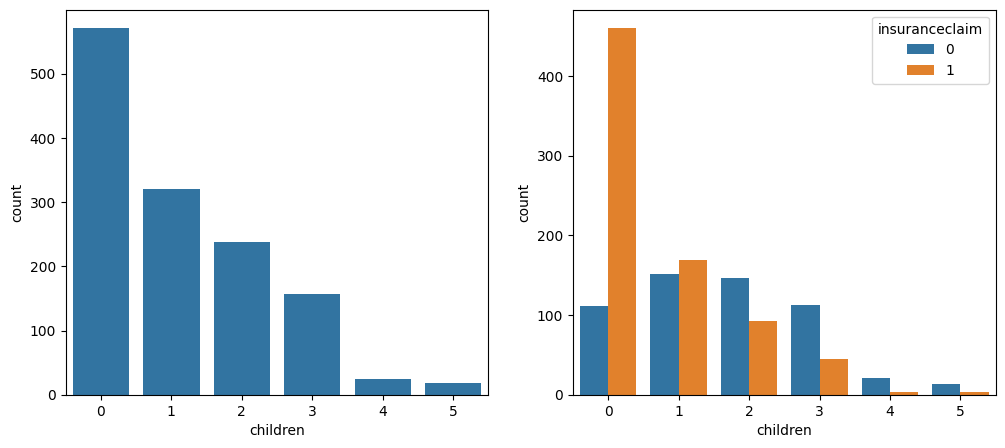

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data = df, x='children',ax=axes[0])
sns.countplot(data = df, x='children',hue='insuranceclaim',ax=axes[1])

plt.show()

The less children the person have, the more likely they are going to make a claim, but lets dig a bit deeper

In [213]:
less_than_3child_df = df[(df['children'] < 3)]
more_than_3child_df = df[(df['children'] > 2)]

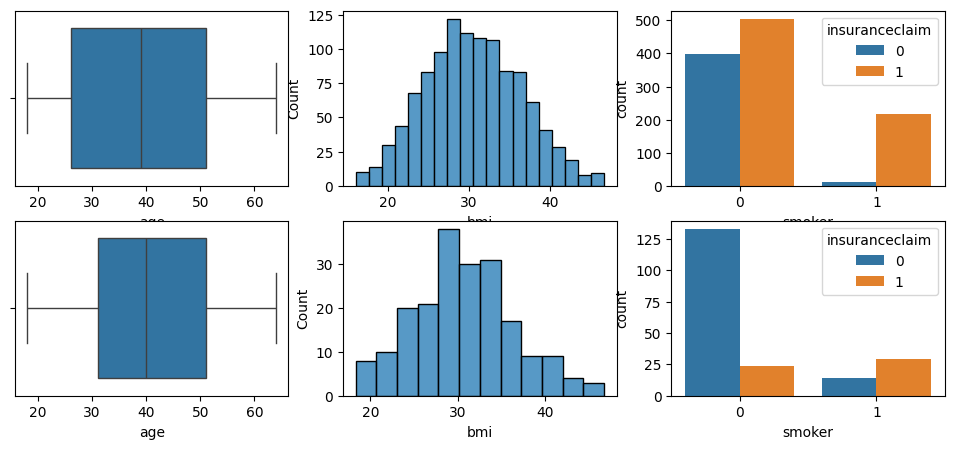

In [223]:
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
sns.boxplot(data = less_than_3child_df, x='age',ax=axes[0,0])
sns.histplot(data = less_than_3child_df, x='bmi',ax=axes[0,1])
sns.countplot(data = less_than_3child_df, x='smoker',hue='insuranceclaim',ax=axes[0,2])
sns.boxplot(data = more_than_3child_df, x='age',ax=axes[1,0])
sns.histplot(data = more_than_3child_df, x='bmi',ax=axes[1,1])
sns.countplot(data = more_than_3child_df, x='smoker',hue='insuranceclaim',ax=axes[1,2])
plt.show()

No significant differences are found other than the number of sample, further analysis is required

# Modelling

In [181]:
#seperate the X and y
y = df["insuranceclaim"]
X = df
#dropping steps, since it correlate with BMI
#dropping sex and region due lack of correlations with y
X.drop(["insuranceclaim",'steps','sex','region'], axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

## Logistic Regression

In [182]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## Support Vector Classifier

In [183]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",svc_model_train_acc)
print("Testing Accuracy: ", svc_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  1.0
Testing Accuracy:  1.0
[[171   0]
 [  0 228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## K-Nearest Neighborhood

In [184]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",knn_model_train_acc)
print("Testing Accuracy: ", knn_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.9967741935483871
Testing Accuracy:  0.9924812030075187
[[171   0]
 [  3 225]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      0.99      0.99       228

    accuracy                           0.99       399
   macro avg       0.99      0.99      0.99       399
weighted avg       0.99      0.99      0.99       399



## Decision Tree Classifier

In [185]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ",decision_tree_model_train_acc)
print("Test accuracy: ",decision_tree_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  1.0
[[171   0]
 [  0 228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



In [186]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(decision_tree_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [187]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
1.0


In [188]:
decision_tree_model = grid_search.best_estimator_
y_pred = decision_tree_model.predict(X_test)

In [189]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {decision_tree_model_train_acc}")
print(f"Test accuracy of Decision Tree is : {decision_tree_model_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 1.0
[[171   0]
 [  0 228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## Random Forrest Classifier

In [190]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ", rf_model_train_acc)
print("Test accuracy: ", rf_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  1.0
[[171   0]
 [  0 228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## Ada Boost Classifier

In [191]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=50)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada_model, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [192]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
1.0


In [193]:
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(X_test)

In [194]:
ada_train_acc = accuracy_score(y_train, ada_model.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 1.0
Test accuracy of Ada Boost is : 1.0
[[171   0]
 [  0 228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## Gradient Boosting Classifier

In [195]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 1.0 

Confusion Matrix :- 
[[171   0]
 [  0 228]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## Stochastic Gradient Boosting

In [196]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 1.0 

Confusion Matrix :- 
[[171   0]
 [  0 228]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## XgBoost Classifier

In [197]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 1.0
[[171   0]
 [  0 228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



In [198]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [199]:
xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [200]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 1.0
[[171   0]
 [  0 228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## Extra Tree Classifier

In [201]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 1.0 

Confusion Matrix :- 
[[171   0]
 [  0 228]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## Voting Classifier

In [202]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc_model), ('knn_model', knn_model),  ('Decision Tree', decision_tree_model), ('Random Forest', rf_model),
               ('Ada Boost', ada_model), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Extra Trees Classifier', etc)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

In [203]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 1.0
Test accuracy of Voting Classifier is : 1.0
[[171   0]
 [  0 228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       228

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



# Model Comparison

In [204]:
models = pd.DataFrame({
    'Model' : ['lr','svc_model', 'knn_model', 'Decision Tree', 'Random Forest','Ada Boost','Gradient Boost', 'SGB', 'Extra Trees', 'XgBoost','Voting Classifier'],
    'Score' : [lr_acc,svc_model_test_acc,   knn_model_test_acc, decision_tree_model_test_acc, rf_model_test_acc, ada_test_acc, gb_acc, sgb_acc, etc_acc, xgb_test_acc, vc_test_acc]
                    })


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,lr,1.000000
1,svc_model,1.000000
3,Decision Tree,1.000000
7,SGB,1.000000
4,Random Forest,1.000000
5,Ada Boost,1.000000
6,Gradient Boost,1.000000
9,XgBoost,1.000000
8,Extra Trees,1.000000
10,Voting Classifier,1.000000


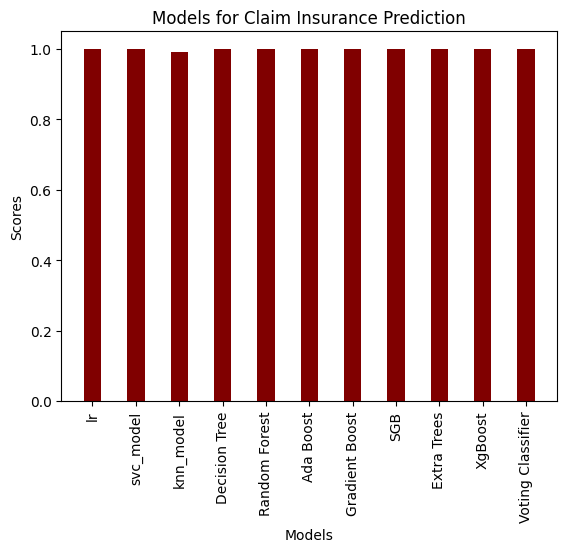

In [205]:
plt.bar(models['Model'],models['Score'], width=0.4, color='maroon')
plt.xlabel("Models")
plt.xticks(rotation=90)
plt.ylabel("Scores")
plt.title("Models for Claim Insurance Prediction")
plt.show()  

# Conclusions

1. Smoking is a clear indication of a higher risk customer, due to the health risk it brings
2. BMI is also a sign of higher chance of claim, for BMI is negatively correlated with steps (indicating the person exercise habit)
3. Person with no children are more likely to issue a claim